In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
%matplotlib inline
import time

In [2]:
df = pd.read_csv('../../Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)
X = df.to_numpy()

np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

y = X[:, -1]
X = X[:, 1:-1]

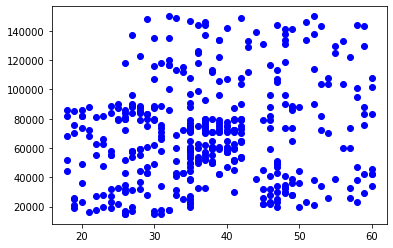

In [7]:
plt.plot(X[:, 0], X[:, 1], 'bo')

In [8]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [123]:
map_size = (10, 10)
tau1 = 50
tau2 = 500
eta0 = 1
sigma0 = (map_size[0] + map_size[1]) / 4
output_map = np.random.random(size=map_size + (2,))

In [124]:
s = time.time()
h_time = 0
n = 0
for e in range(10):
    np.random.shuffle(X)
    for i in range(X.shape[0]):
        # ----> train SOM
        
        z = np.sum((output_map - X[i]) ** 2, axis=2)
        winner_x, winner_y = np.unravel_index(z.argmin(), z.shape)
        
        sigma = sigma0 * np.exp(-n / tau1)
        eta = eta0 * np.exp(-n / tau2)
        error = X[i] - output_map
        
#         h_s = time.time()
#         h = np.zeros(map_size + (2,))
#         for j in range(map_size[0]):
#             for k in range(map_size[1]):
#                 d2 = (j - winner_x) ** 2 + (k - winner_y) ** 2
#                 h[j, k, 0] = np.exp(- (d2) / (2 * sigma ** 2))
#                 h[j, k, 1] = np.exp(- (d2) / (2 * sigma ** 2))
#         h_e = time.time()
#         h_time += h_e - h_s

        h_s = time.time()
        x = np.arange(0, map_size[0]) - winner_x
        y = np.arange(0, map_size[1]) - winner_y
        msh = np.stack(np.meshgrid(x, y), axis=2)
        d2 = np.sum(msh ** 2, axis=2)
        h = np.exp(-d2 / (2 * sigma ** 2))
        h = np.tile(h, [2, 1, 1]).transpose([2, 1, 0])
        h_e = time.time()
        h_time += h_e - h_s
        
        output_map = output_map + (eta * h * error) 
        
        # <---- train SOM
        n += 1
e = time.time()
print(e - s)
print(h_time)
print(e - s - h_time)

0.5055298805236816
0.346782922744751
0.15874695777893066


In [121]:
winner_x, winner_y, sigma
# [
#         [0, 0], [0, 1], [0, 2] ...,
#         [1, 0], [1, 1], [1, 2] ...,
#         [2, 0], [2, 1], [2, 2] ...,
#     ]
x = np.arange(0, map_size[0]) - winner_x
y = np.arange(0, map_size[1]) - winner_y
msh = np.stack(np.meshgrid(x, y), axis=2)
d2 = np.sum(msh ** 2, axis=2)
h = np.exp(-d2 / (2 * sigma ** 2))
h = np.tile(h, [2, 1, 1]).transpose([2, 1, 0])

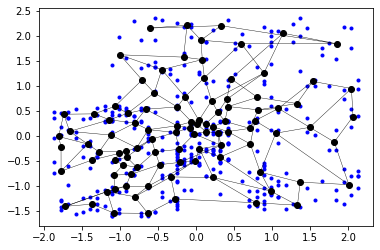

In [125]:
plt.plot(X[:, 0], X[:, 1], 'b.')
plt.plot(output_map[:, :, 0].T, output_map[:, :, 1].T, 'k-', lw=0.4)
plt.plot(output_map[:, :, 0], output_map[:, :, 1], 'k-', lw=0.4)
plt.plot(output_map[:, :, 0], output_map[:, :, 1], 'ko')